#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [40]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vasil\miniconda3\Scripts\gdown.exe\__main__.py", line 7, in <module>
  File "C:\Users\vasil\miniconda3\Lib\site-packages\gdown\cli.py", line 156, in main
    filename = download(
               ^^^^^^^^^
  File "C:\Users\vasil\miniconda3\Lib\site-packages\gdown\download.py", line 259, in download
    filename_from_url = m.groups()[0]
                        ^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'groups'


In [41]:
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv('diabetes.csv')

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


In [48]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [49]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [50]:
missing_values_percent = df.isnull().sum() / len(df) * 100
missing_values_percent

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

Visualize the missing values using Missingno library

<Axes: >

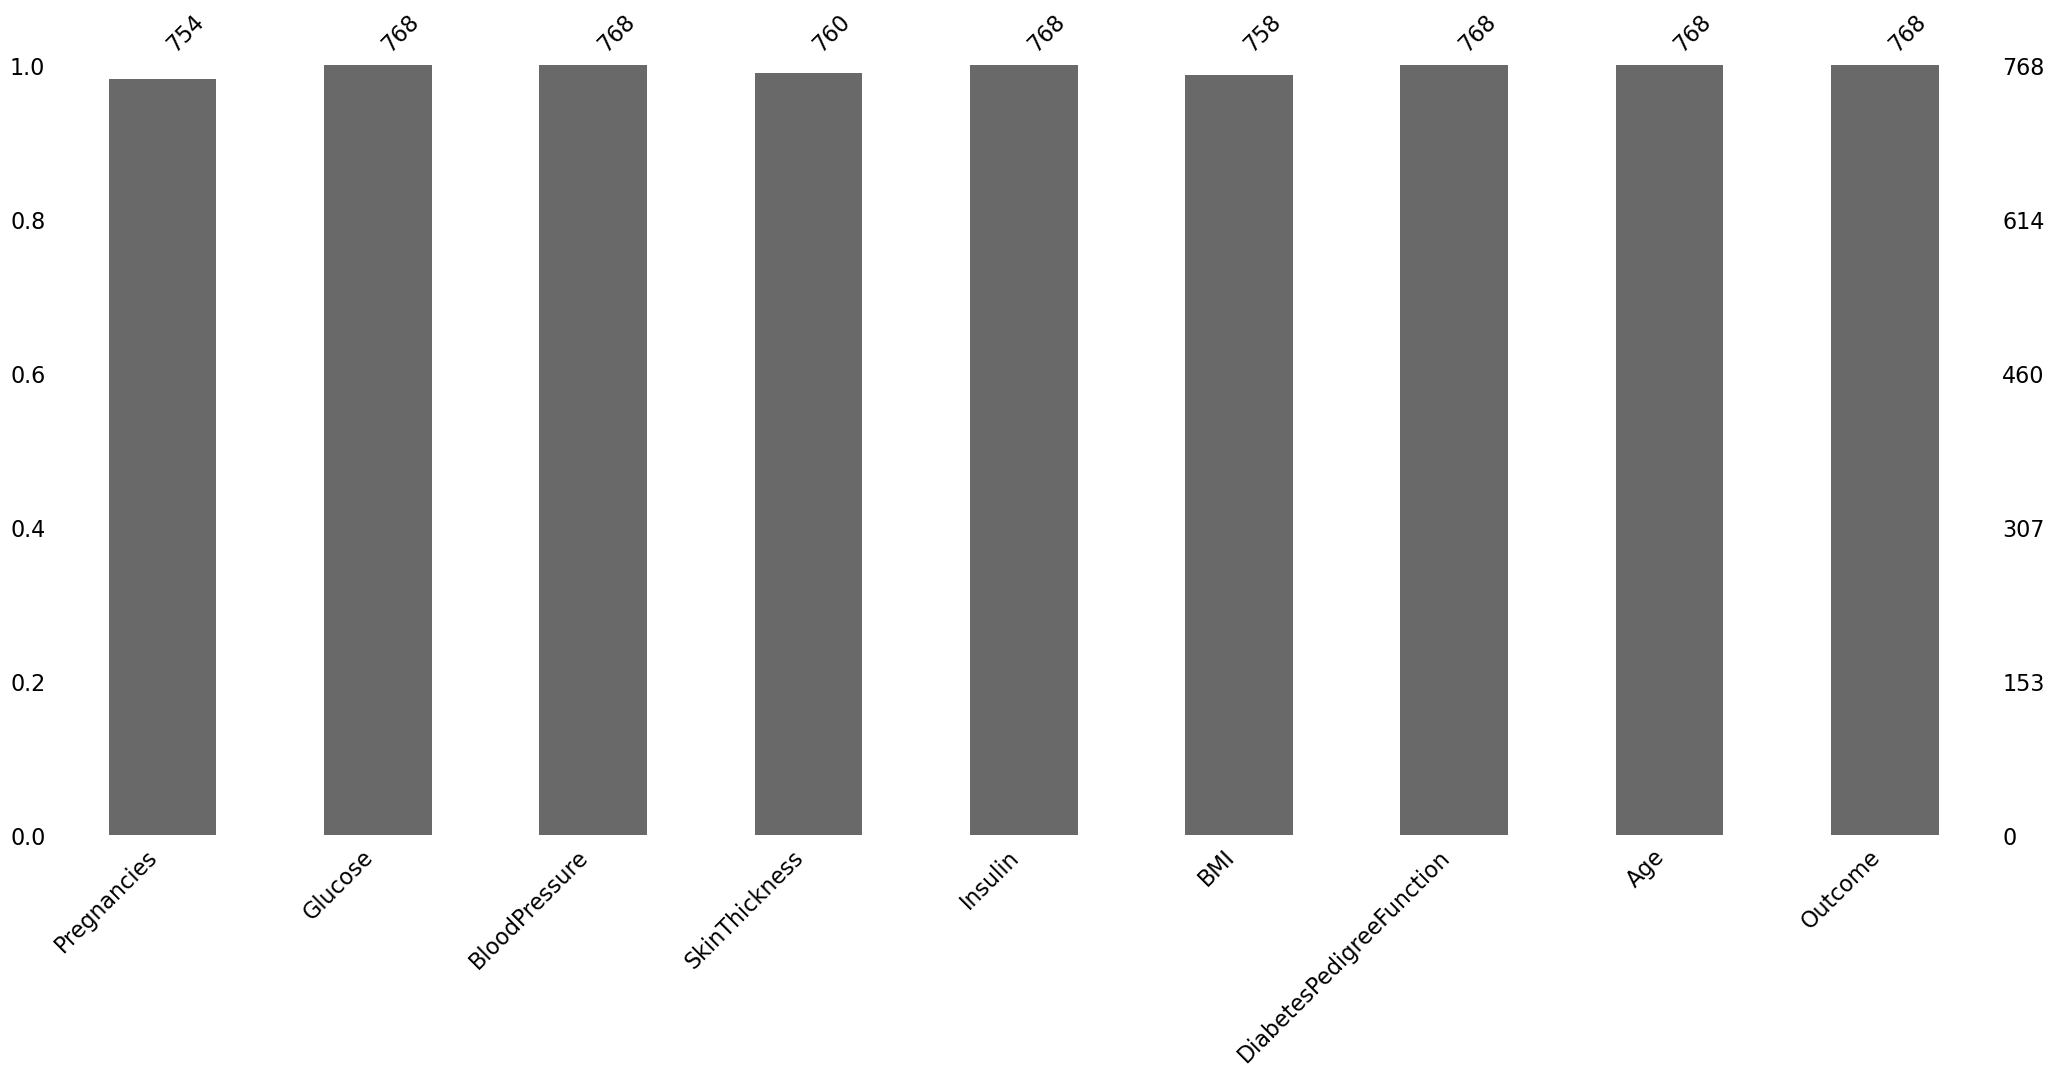

In [52]:
msno.bar(df)

<Axes: >

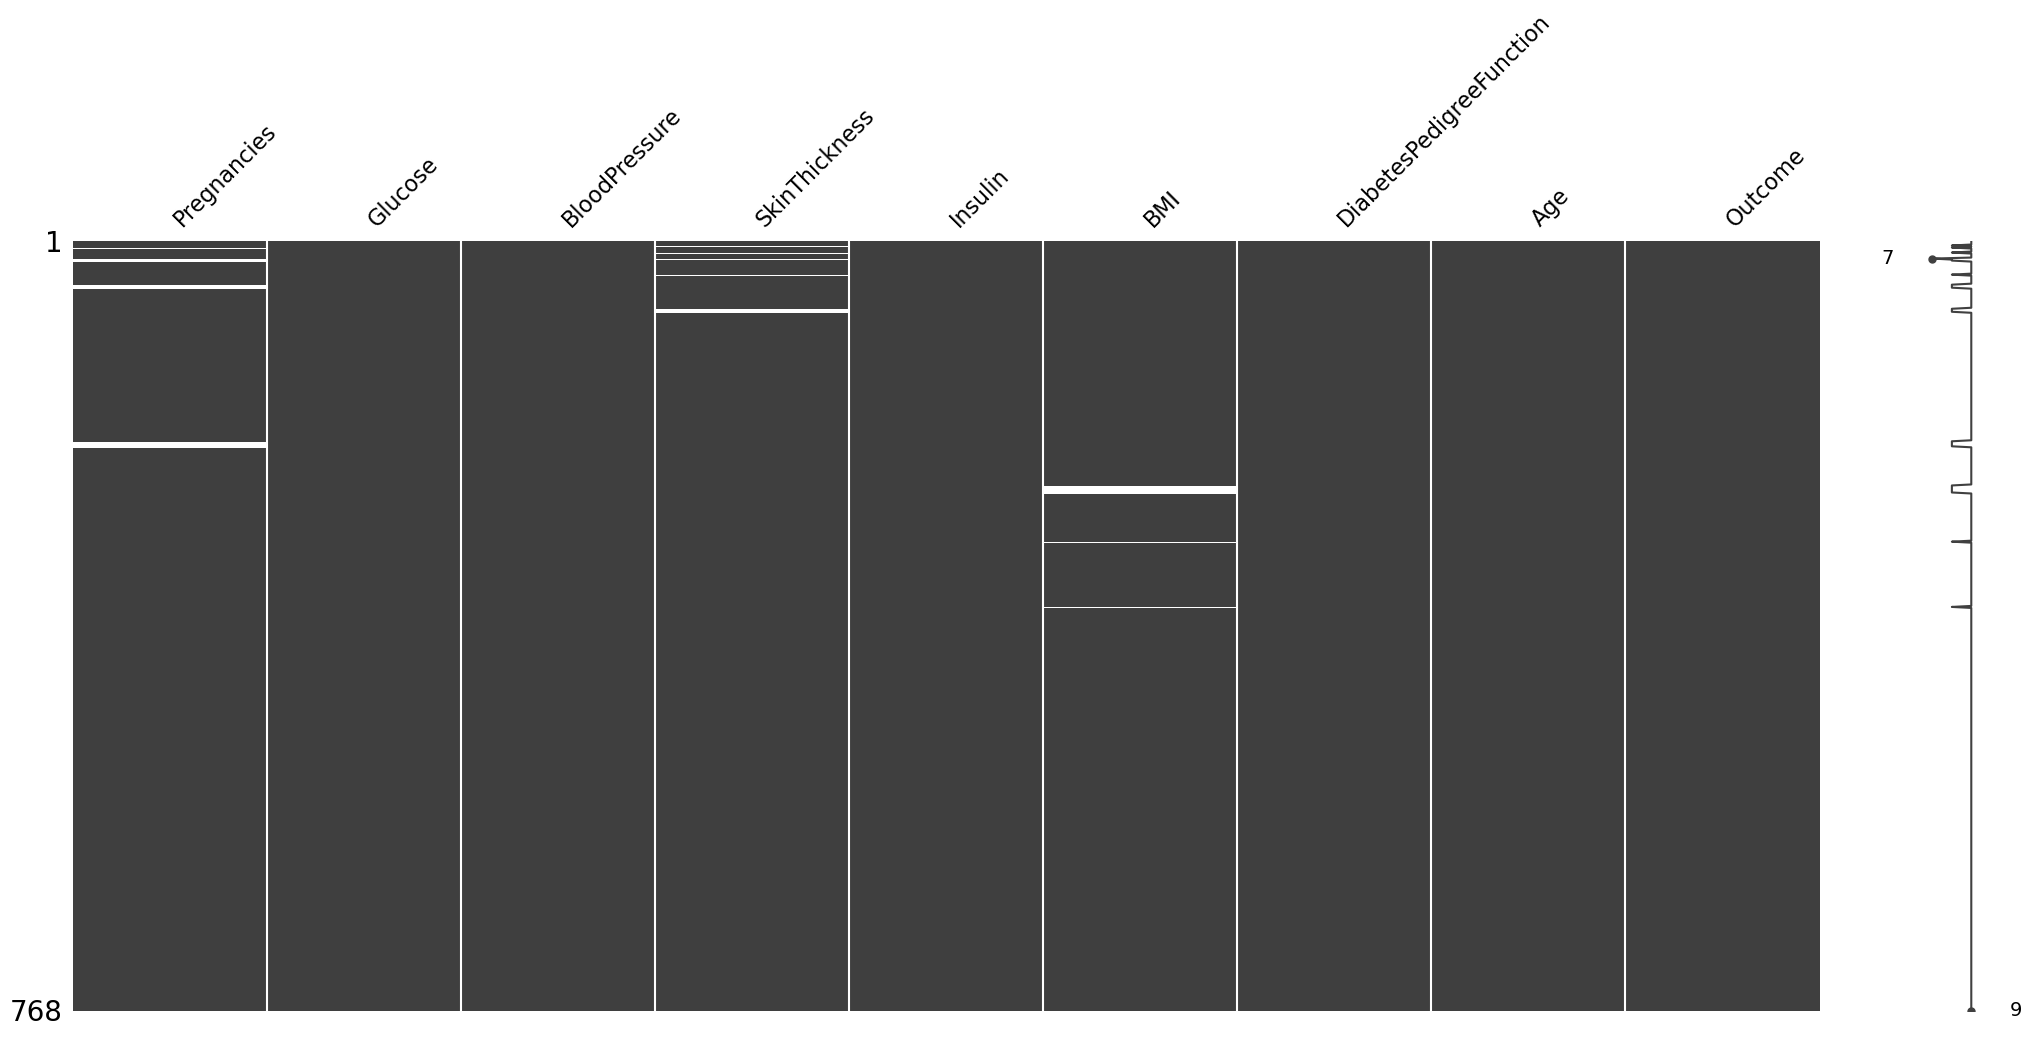

In [53]:
msno.matrix(df)

<Axes: >

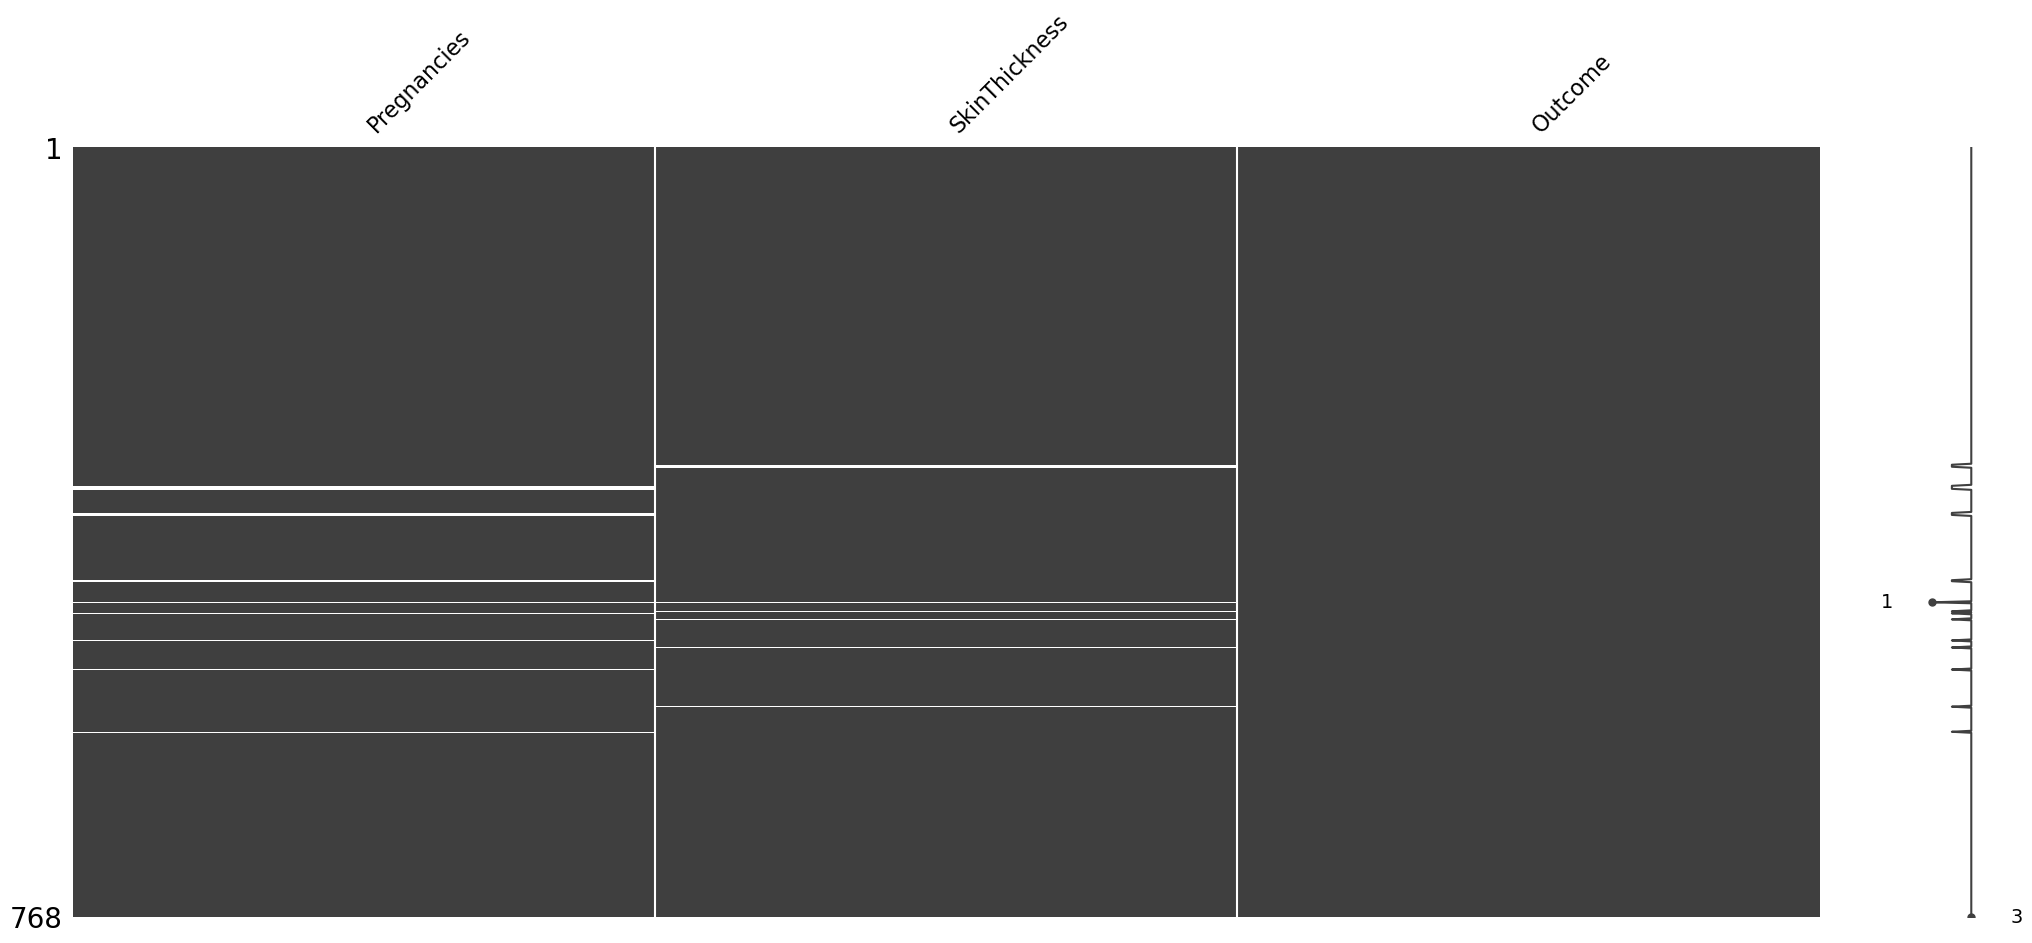

In [54]:
#msno.matrix(df.sort_values('Outcome'))
#msno.matrix(df[['Outcome', 'Pregnancies']].sort_values('Outcome'))  # For Pregnancies
msno.matrix(df[['Pregnancies', 'SkinThickness', 'Outcome']].sort_values('Outcome'))

<Axes: >

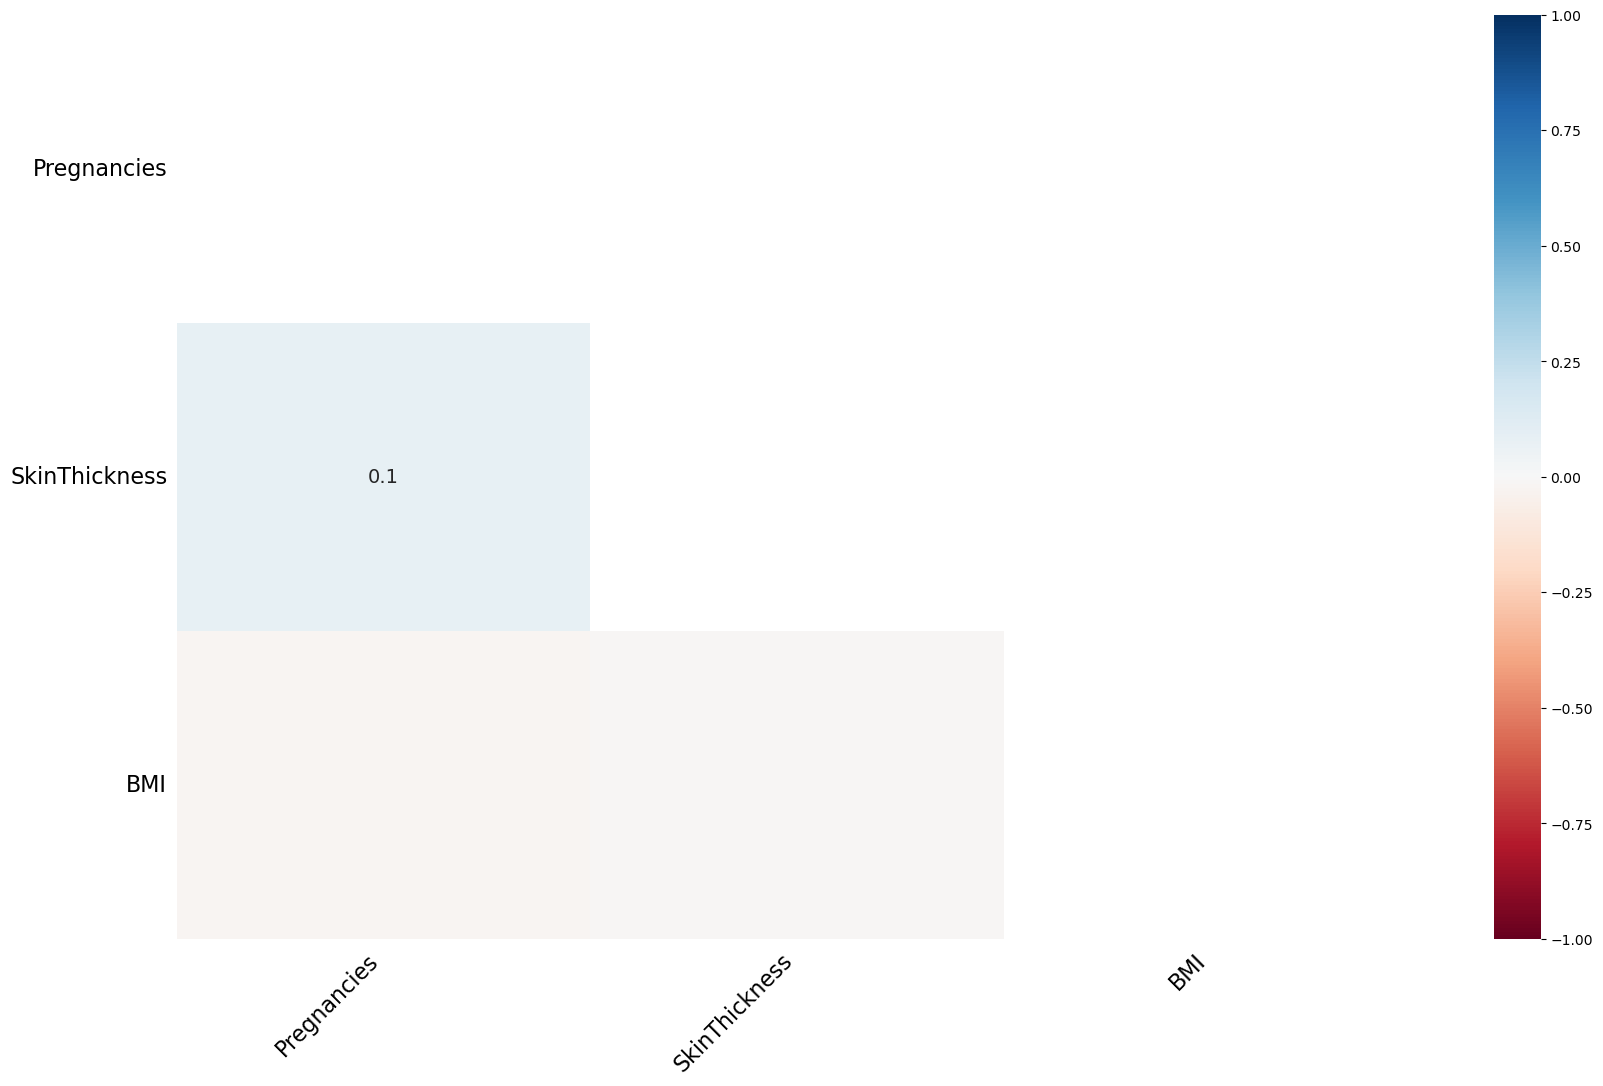

In [55]:
msno.heatmap(df)

## <font color = 'Orange'>Handle the missing values</font>

In [57]:
data_cleaned = df.copy()

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

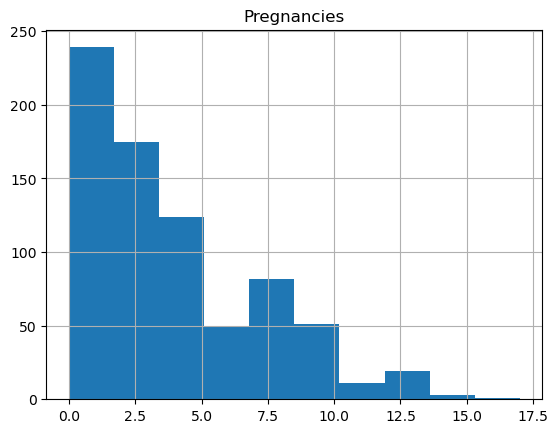

In [58]:
df.hist(['Pregnancies'])

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

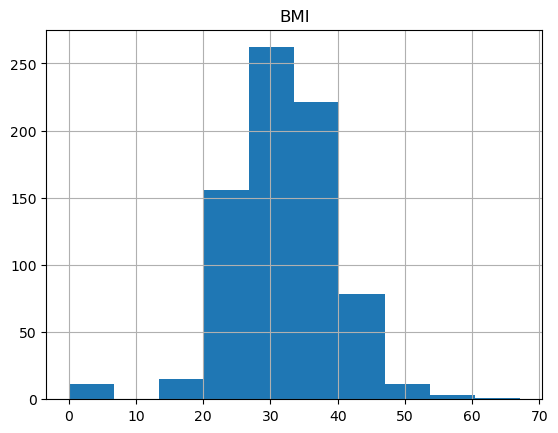

In [59]:
df.hist(['BMI'])

In [60]:
imputer_median = SimpleImputer(strategy='median')
data_cleaned[['Pregnancies', 'SkinThickness']] = imputer_median.fit_transform(data_cleaned[['Pregnancies', 'SkinThickness']])
imputer_mean = SimpleImputer(strategy = 'mean')
data_cleaned['BMI'] = imputer_mean.fit_transform(data_cleaned[['BMI']])

In [61]:
data_cleaned.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [63]:
data_cleaned.to_csv("data_cleaned.csv", index=False)

Print the first rows of your final Dataset

In [65]:
data = pd.read_csv("data_cleaned.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [68]:
from sklearn.model_selection import train_test_split


In [69]:
x = data_cleaned.drop("Outcome", axis = 1)
y = data_cleaned["Outcome"]

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x-train 80% od site koloni osven target
#x-test 20% od site koloni osven target
#y-train 80% od target
#y-test 20% od target kolona 
#modelot uci od x-train i y-train, vo x-test imame podatoci koi ne im go znaeme outcome, vo y-test ni e outcome za podatocite od x-test

In [71]:
x_train.shape, y_train.shape
#shape ni kazuva samo kolku redici i koloni imame 

((614, 8), (614,))

In [72]:
x_test.shape, y_test.shape

((154, 8), (154,))

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [77]:
y_pred = knn_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [79]:
from sklearn.metrics import  classification_report

In [80]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
#f1 = mean(precison, recall)
#support - 99 se 0, 55 se 1- realno NEBALANSIRANO
#accuracy - kolku pogodil u prosek 
#macro = mean(f1) bez da se zeme vo predvid nebalansiranosta
#w_avg = acc - se zemaat vo predvid i nebalansiranosta

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        99
           1       0.51      0.65      0.58        55

    accuracy                           0.66       154
   macro avg       0.64      0.66      0.64       154
weighted avg       0.68      0.66      0.66       154



In [81]:
#add your code